# BER verse $E_b/N_o$

Kevin J. Walchko, Phd

6 Mar 2022

---

## Calculating Bit Error Rate (BER)

For BPSK the BER is:

$$
\DeclareMathOperator\erf{erfc}
BER = \frac{1}{2} erfc \left( \sqrt{\frac{E_b}{N_o}} \right)
$$

## References

- [BPSK bit error rate simulation in Python & Matlab](https://www.gaussianwaves.com/2020/07/bpsk-python-matlab-bit-error-rate-simulation/)
- [BPSK Bit Error Rate Calculation Using Python](http://www.raymaps.com/index.php/bpsk-bit-error-rate-calculation-using-python/)

In [1]:
# reload library
%load_ext autoreload
%autoreload 2

In [5]:
from doop.constants import speedOfLight as c
import numpy as np
from numpy import sqrt
from numpy.random import rand, randn
from math import pi, log10, log2
from matplotlib import pyplot as plt
from scipy.special import erfc # erfc/Q function
from tqdm import tqdm

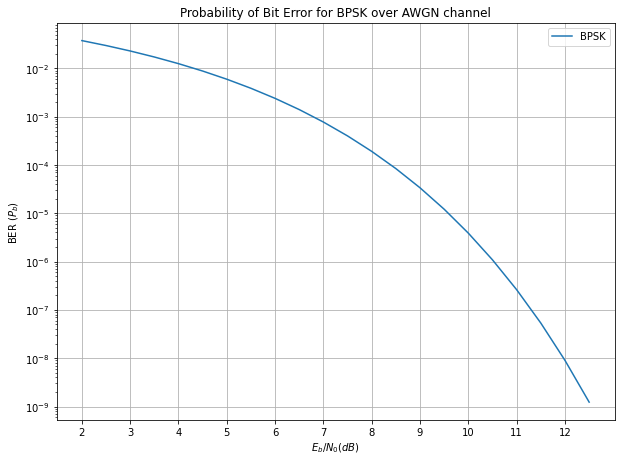

In [6]:
#Eb/N0 Vs BER for BPSK over AWGN (complex baseband model)
# © Author: Mathuranathan Viswanathan (gaussianwaves.com)

# Eb/N0 range in dB for simulation
ebnoStart = 2
ebnoStop = 13
EbN0dBs = np.arange(start=ebnoStart,stop = ebnoStop, step = .5)

# fix x-axis
ticks = np.arange(ebnoStart,ebnoStop, 1)

BER_theory = 0.5*erfc(np.sqrt(10**(EbN0dBs/10)))

fig, ax = plt.subplots(nrows=1,ncols = 1, figsize=(10,10))
fig.figsize = (200,10)
ax.semilogy(EbN0dBs,BER_theory,marker='',linestyle='-',label='BPSK')
ax.set_xlabel('$E_b/N_0(dB)$');
ax.set_ylabel('BER ($P_b$)')
ax.set_title('Probability of Bit Error for BPSK over AWGN channel')
ax.set_aspect('equal')
ax.set_xticks(ticks)
ax.grid(True)
ax.legend();

100%|███████████████████████████████████████████| 12/12 [00:02<00:00,  4.05it/s]


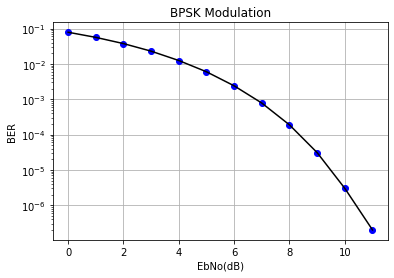

In [7]:
N = 5000000
EbNodB_range = range(0,12)
ber = []

for EbNodB in tqdm(EbNodB_range):
    EbNo=10.0**(EbNodB/10.0)
    x = 2 * (rand(N) >= 0.5) - 1
    noise_std = 1/sqrt(2*EbNo)
    y = x + noise_std * randn(N)
    y_d = 2 * (y >= 0) - 1
    errors = (x != y_d).sum()
    ber_n = 1.0 * errors / N
    ber.append(ber_n)
    
plt.plot(EbNodB_range, ber, 'bo', EbNodB_range, ber, 'k')
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('EbNo(dB)')
plt.ylabel('BER')
plt.grid(True)
plt.title('BPSK Modulation');